<a href="https://colab.research.google.com/github/Rishu-N/COMPUTER-VISION/blob/main/VEHICLE_COUNTING_YOLO_MODEL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6zyoU6ppl06mpQIgFbVY")
project = rf.workspace("cc-pintel").project("car-counting")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Car-Counting-1 in yolov8:: 100%|██████████| 14578/14578 [00:02<00:00, 6587.39it/s]


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 21.9 MB/s eta 0:00:00


In [ ]:
# Importing necessary libraries
from ultralytics import YOLO
import cv2
import torch

# Loading the dataset
dataset_path = '/content/Car-Counting-1/data.yaml'  # Path to your data.yaml file

# Create a YOLOv8 model from scratch (or load pre-trained model for transfer learning)
model = YOLO('yolov8n.pt')  # YOLOv8n is the small model, you can use other sizes (e.g., yolov8m.pt)

# Train the model
results = model.train(data=dataset_path, epochs=35, imgsz=640, batch=16)  # Training parameters

# Evaluate the model on validation data
metrics = model.val()


'''
# Example: Count vehicles in a validation image
validation_image_path = '/mnt/data/valid/images/sample_image.jpg'  # Replace with an actual image path
count_vehicles(validation_image_path)
'''

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Car-Counting-1/data.yaml, epochs=35, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

100%|██████████| 755k/755k [00:00<00:00, 95.4MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 264MB/s]


AMP: checks passed ✅


train: Scanning /content/Car-Counting-1/train/labels... 5536 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5536/5536 [00:03<00:00, 1670.10it/s]


train: New cache created: /content/Car-Counting-1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 87, len(boxes) = 31431. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Car-Counting-1/valid/labels... 1456 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1456/1456 [00:02<00:00, 523.85it/s]


val: New cache created: /content/Car-Counting-1/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 8572. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35      2.56G      1.445      2.271      1.184        114        640: 100%|██████████| 346/346 [01:58<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:16<00:00,  2.73it/s]


                   all       1456       8572      0.821        0.2      0.235      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35       2.5G      1.363       1.56      1.147        189        640: 100%|██████████| 346/346 [01:51<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.44it/s]


                   all       1456       8572      0.654      0.361      0.388      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35      2.47G      1.352      1.408       1.15        174        640: 100%|██████████| 346/346 [01:51<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:15<00:00,  2.99it/s]


                   all       1456       8572      0.613      0.454      0.472      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35      2.81G       1.33      1.285      1.141        120        640: 100%|██████████| 346/346 [01:53<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.10it/s]


                   all       1456       8572      0.551      0.489      0.479      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35      2.63G      1.321      1.211      1.133        130        640: 100%|██████████| 346/346 [01:55<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:15<00:00,  3.06it/s]

                   all       1456       8572      0.609      0.536      0.517      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35      2.34G      1.303      1.146      1.129        141        640: 100%|██████████| 346/346 [01:52<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.07it/s]


                   all       1456       8572      0.658      0.522      0.552      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35      2.47G      1.301      1.103      1.125         92        640: 100%|██████████| 346/346 [01:54<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.29it/s]


                   all       1456       8572      0.709      0.537       0.58      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35      2.42G      1.285      1.069      1.119        160        640: 100%|██████████| 346/346 [01:52<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:15<00:00,  3.00it/s]


                   all       1456       8572      0.718      0.513      0.573      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35      2.81G      1.282      1.042      1.117        135        640: 100%|██████████| 346/346 [01:56<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.40it/s]

                   all       1456       8572      0.653      0.557      0.587      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35      2.69G      1.276      1.014      1.114        137        640: 100%|██████████| 346/346 [01:55<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:15<00:00,  3.04it/s]


                   all       1456       8572      0.716      0.525      0.634      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35      2.38G       1.27     0.9963      1.107        164        640: 100%|██████████| 346/346 [01:55<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.39it/s]

                   all       1456       8572      0.708      0.566      0.619      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35      2.46G       1.26     0.9807      1.103        127        640: 100%|██████████| 346/346 [01:55<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:15<00:00,  2.92it/s]

                   all       1456       8572      0.696      0.592      0.657      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35      2.61G      1.254     0.9592      1.096        117        640: 100%|██████████| 346/346 [01:56<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.48it/s]

                   all       1456       8572      0.718      0.602      0.641      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/35      2.41G      1.257     0.9518      1.097        107        640: 100%|██████████| 346/346 [01:59<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:15<00:00,  2.98it/s]


                   all       1456       8572      0.708      0.611      0.712       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/35      2.53G       1.25     0.9281      1.099        176        640: 100%|██████████| 346/346 [01:58<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.26it/s]


                   all       1456       8572       0.71      0.605      0.644      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/35      2.51G      1.246     0.9165      1.094        145        640: 100%|██████████| 346/346 [01:56<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.10it/s]


                   all       1456       8572      0.693      0.652      0.677      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/35      2.68G      1.234     0.9042      1.093        149        640: 100%|██████████| 346/346 [01:51<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.32it/s]


                   all       1456       8572      0.763      0.601      0.693      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/35      2.64G      1.234     0.8868       1.09        139        640: 100%|██████████| 346/346 [01:54<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.15it/s]

                   all       1456       8572      0.739      0.628       0.69      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/35      2.61G      1.227      0.877      1.087        187        640: 100%|██████████| 346/346 [01:54<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:15<00:00,  3.04it/s]

                   all       1456       8572      0.743      0.601      0.659      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/35      2.51G       1.22      0.877      1.085        141        640: 100%|██████████| 346/346 [01:56<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.34it/s]

                   all       1456       8572      0.754      0.616      0.709      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/35      2.95G      1.218      0.867      1.088        150        640: 100%|██████████| 346/346 [01:53<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:15<00:00,  3.01it/s]


                   all       1456       8572      0.744      0.638      0.712      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/35      2.64G       1.22     0.8549      1.083        137        640: 100%|██████████| 346/346 [01:57<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.16it/s]

                   all       1456       8572      0.763      0.604        0.7      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/35      2.49G      1.213     0.8364       1.08        133        640: 100%|██████████| 346/346 [01:54<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.21it/s]


                   all       1456       8572      0.769      0.608      0.709      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/35      2.46G      1.205     0.8358      1.077        138        640: 100%|██████████| 346/346 [01:57<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.08it/s]

                   all       1456       8572      0.735      0.644       0.75      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/35      2.47G      1.197     0.8233      1.075        118        640: 100%|██████████| 346/346 [01:54<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:15<00:00,  2.98it/s]


                   all       1456       8572      0.784      0.622      0.816      0.545
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/35      2.33G      1.192      0.738      1.087         82        640: 100%|██████████| 346/346 [01:54<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.37it/s]

                   all       1456       8572      0.773      0.647      0.824      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/35      2.42G      1.182      0.722      1.083         91        640: 100%|██████████| 346/346 [01:51<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.40it/s]

                   all       1456       8572      0.781      0.633      0.737      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/35       2.5G      1.175     0.7047      1.079         95        640: 100%|██████████| 346/346 [01:54<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:12<00:00,  3.55it/s]

                   all       1456       8572      0.806       0.62      0.719      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/35       2.4G      1.171     0.6937      1.073        105        640: 100%|██████████| 346/346 [01:49<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.48it/s]

                   all       1456       8572      0.786      0.632      0.828      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/35      2.39G      1.169     0.6847      1.077         79        640: 100%|██████████| 346/346 [01:49<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.43it/s]

                   all       1456       8572      0.805      0.641      0.771      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/35      2.41G      1.158     0.6714      1.072        101        640: 100%|██████████| 346/346 [01:49<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.43it/s]


                   all       1456       8572      0.804      0.639       0.84      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/35      2.52G      1.156     0.6653      1.068        112        640: 100%|██████████| 346/346 [01:48<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.26it/s]


                   all       1456       8572       0.81      0.653       0.84      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/35      2.31G       1.15     0.6553      1.065        106        640: 100%|██████████| 346/346 [01:50<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.19it/s]


                   all       1456       8572      0.565      0.865      0.777      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/35      2.51G      1.148     0.6476      1.063         83        640: 100%|██████████| 346/346 [01:47<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.13it/s]


                   all       1456       8572      0.572      0.863       0.84      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/35      2.41G      1.145     0.6436      1.061         88        640: 100%|██████████| 346/346 [01:47<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:14<00:00,  3.18it/s]


                   all       1456       8572      0.599      0.868      0.845      0.559

35 epochs completed in 1.256 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:18<00:00,  2.53it/s]


                   all       1456       8572      0.599      0.868      0.845      0.559
                   Bus         35         37       0.59      0.676      0.679      0.532
           Motorcyecle         66         88      0.512      0.761      0.751      0.366
                Pickup       1180       2986       0.69       0.95      0.925      0.631
                   SUV          1          1      0.482          1      0.995      0.597
                 Sedan       1149       3003      0.717      0.931      0.919      0.606
                   Suv        459        608      0.461      0.806      0.689      0.467
                 Truck        849       1461      0.691       0.94      0.915      0.673
                   Van        322        388      0.651      0.881      0.884      0.597
Speed: 0.3ms preprocess, 2.2ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/train2
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

val: Scanning /content/Car-Counting-1/valid/labels.cache... 1456 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1456/1456 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 8572. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [00:19<00:00,  4.77it/s]


                   all       1456       8572      0.599      0.868      0.844       0.56
                   Bus         35         37      0.593      0.676      0.679      0.535
           Motorcyecle         66         88      0.507      0.761      0.746      0.368
                Pickup       1180       2986      0.689       0.95      0.925      0.631
                   SUV          1          1      0.482          1      0.995      0.597
                 Sedan       1149       3003      0.717      0.931      0.919      0.606
                   Suv        459        608       0.46      0.806      0.689      0.467
                 Truck        849       1461       0.69       0.94      0.915      0.673
                   Van        322        388      0.651      0.881      0.884        0.6
Speed: 0.3ms preprocess, 4.0ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train22


"\n# Example: Count vehicles in a validation image\nvalidation_image_path = '/mnt/data/valid/images/sample_image.jpg'  # Replace with an actual image path\ncount_vehicles(validation_image_path)\n"

In [ ]:
# Save the trained model in a portable format (TorchScript)
model_path = '/content/Car-Counting-1'
model.export(format='torchscript')

print(f"Model saved in TorchScript format at: {model_path}")

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 14, 8400) (6.0 MB)

TorchScript: starting export with torch 2.5.0+cu121...
TorchScript: export success ✅ 1.9s, saved as 'runs/detect/train2/weights/best.torchscript' (11.9 MB)

Export complete (2.3s)
Results saved to /content/runs/detect/train2/weights
Predict:         yolo predict task=detect model=runs/detect/train2/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train2/weights/best.torchscript imgsz=640 data=/content/Car-Counting-1/data.yaml  
Visualize:       https://netron.app
Model saved in TorchScript format at: /content/Car-Counting-1


In [ ]:
import shutil

# Specify the folder to be zipped and the name of the zip file
folder_to_zip = '/content/runs'  # Replace 'folder_name' with your folder's path
zip_file_name = '//content/runs.zip'  # Path where the zip will be saved

# Create a zip archive
shutil.make_archive(zip_file_name.replace('.zip', ''), 'zip', folder_to_zip)

print(f"Folder zipped successfully as {zip_file_name}")


Folder zipped successfully as //content/runs.zip


In [3]:
!unzip /content/runs.zip -d /content/run

Archive:  /content/runs.zip
   creating: /content/run/detect/
   creating: /content/run/detect/train/
   creating: /content/run/detect/train2/
   creating: /content/run/detect/train22/
   creating: /content/run/detect/train2/weights/
  inflating: /content/run/detect/train2/P_curve.png  
  inflating: /content/run/detect/train2/train_batch8651.jpg  
  inflating: /content/run/detect/train2/results.png  
  inflating: /content/run/detect/train2/args.yaml  
  inflating: /content/run/detect/train2/val_batch2_labels.jpg  
  inflating: /content/run/detect/train2/confusion_matrix.png  
  inflating: /content/run/detect/train2/val_batch0_labels.jpg  
  inflating: /content/run/detect/train2/val_batch0_pred.jpg  
  inflating: /content/run/detect/train2/R_curve.png  
  inflating: /content/run/detect/train2/PR_curve.png  
  inflating: /content/run/detect/train2/labels_correlogram.jpg  
  inflating: /content/run/detect/train2/events.out.tfevents.1731561243.6fba5544475d.667.0  
  inflating: /content/run

In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model
model_path = "/content/run/detect/train2/weights/best.pt"
loaded_model = YOLO(model_path)

# Now let's use the model for inference (testing on validation images to count cars)
def count_vehicles(image_path):
    # Load image
    image = cv2.imread(image_path)

    # Perform inference
    results = model(image)

    # Extract boxes and class ids
    boxes = results[0].boxes
    class_ids = boxes.cls

    # Count vehicles (you can further refine by specifying the classes of interest)
    vehicle_count = len([cls for cls in class_ids if int(cls) in range(10)])  # Filter for vehicle classes

    # Display results
    print(f"Total number of vehicles in the image: {vehicle_count}")

    return vehicle_count

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Importing necessary libraries
from ultralytics import YOLO
import cv2

# Load the pre-trained YOLOv8 model from .pt file
model = YOLO('/content/run/detect/train2/weights/best.pt')  # Replace 'your_model_path.pt' with the actual path to your .pt model

# Perform inference on an image
image_path = '/content/Car-Counting-1/train/images/-freemake_com-LOGO--DOH_14_mp4-0_jpg.rf.b3dbb613a92a391872665f28503e0594.jpg'  # Replace with your image path
results = model(image_path)  # Run inference

# Display the results
##results.show()  # This will open a window with the image and detected objects

# Alternatively, you can save the results
#results.save('/content/testing/')  # This will save the output images with detections to 'inference_results/' folder

# If you want to access detected boxes, class IDs, and confidence scores:
for result in results:
    boxes = result.boxes  # Bounding boxes
    class_ids = result.boxes.cls  # Class IDs of detected objects
    confidences = result.boxes.conf  # Confidence scores of the detections

    print(f"Detected {len(class_ids)} objects with the following class IDs: {class_ids}")
    print(f"Confidence scores: {confidences}")



image 1/1 /content/Car-Counting-1/train/images/-freemake_com-LOGO--DOH_14_mp4-0_jpg.rf.b3dbb613a92a391872665f28503e0594.jpg: 640x640 6 Pickups, 7 Sedans, 6 Trucks, 7.4ms
Speed: 12.3ms preprocess, 7.4ms inference, 693.6ms postprocess per image at shape (1, 3, 640, 640)
Detected 19 objects with the following class IDs: tensor([4., 2., 2., 8., 4., 2., 2., 2., 2., 8., 8., 4., 4., 4., 8., 8., 8., 4., 4.], device='cuda:0')
Confidence scores: tensor([0.8109, 0.6613, 0.6459, 0.6232, 0.6224, 0.5753, 0.4571, 0.3808, 0.3660, 0.3464, 0.3452, 0.3403, 0.3394, 0.3350, 0.3183, 0.3160, 0.2678, 0.2609, 0.2550], device='cuda:0')



image 1/1 /content/Car-Counting-1/train/images/-freemake_com-LOGO--DOH_14_mp4-0_jpg.rf.b3dbb613a92a391872665f28503e0594.jpg: 640x640 6 Pickups, 7 Sedans, 6 Trucks, 8.6ms
Speed: 3.4ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


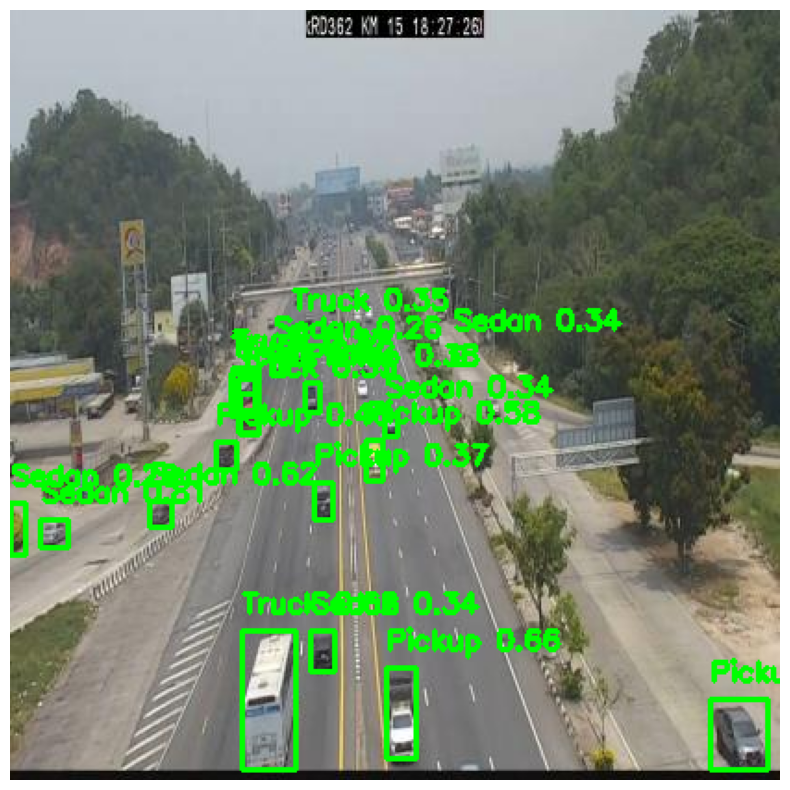

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Perform inference on an image
image_path = '/content/Car-Counting-1/train/images/-freemake_com-LOGO--DOH_14_mp4-0_jpg.rf.b3dbb613a92a391872665f28503e0594.jpg'  # Replace with your image path
results = model(image_path)  # Run inference

# Load the original image using OpenCV
image = cv2.imread(image_path)

# Loop through the predictions and draw bounding boxes
for result in results:
    boxes = result.boxes.xyxy  # Get the bounding box coordinates in (x1, y1, x2, y2) format
    class_ids = result.boxes.cls  # Get the class IDs for each box
    confidences = result.boxes.conf  # Get the confidence scores for each detection

    # Iterate over each detected object
    for i in range(len(boxes)):
        x1, y1, x2, y2 = map(int, boxes[i])  # Convert box coordinates to integers
        class_id = int(class_ids[i])
        confidence = confidences[i]

        # Draw the bounding box
        color = (0, 255, 0)  # Green color for the box
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)  # Draw the bounding box

        # Add label with class name and confidence score
        label = f"{model.names[class_id]} {confidence:.2f}"
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Convert the image from BGR (OpenCV default) to RGB for matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image with bounding boxes using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()



image 1/1 /content/Car-Counting-1/train/images/-freemake_com-LOGO--DOH_14_mp4-0_jpg.rf.b3dbb613a92a391872665f28503e0594.jpg: 640x640 6 Pickups, 8 Sedans, 1 Suv, 5 Trucks, 19.3ms
Speed: 5.6ms preprocess, 19.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Skipping malformed line: 8 0.3227975168269231 0.46810226682692313 0.30777878125 0.46964400721153843 0.2855395048076923 0.49431161298076925 0.2881388918269231 0.5302851826923077 0.30300307211538463 0.5283344350961539 0.30286880048076925 0.5302851826923077 0.32510809615384617 0.5030480408653847 0.3227975168269231 0.46810226682692313



<Figure size 3000x3000 with 0 Axes>

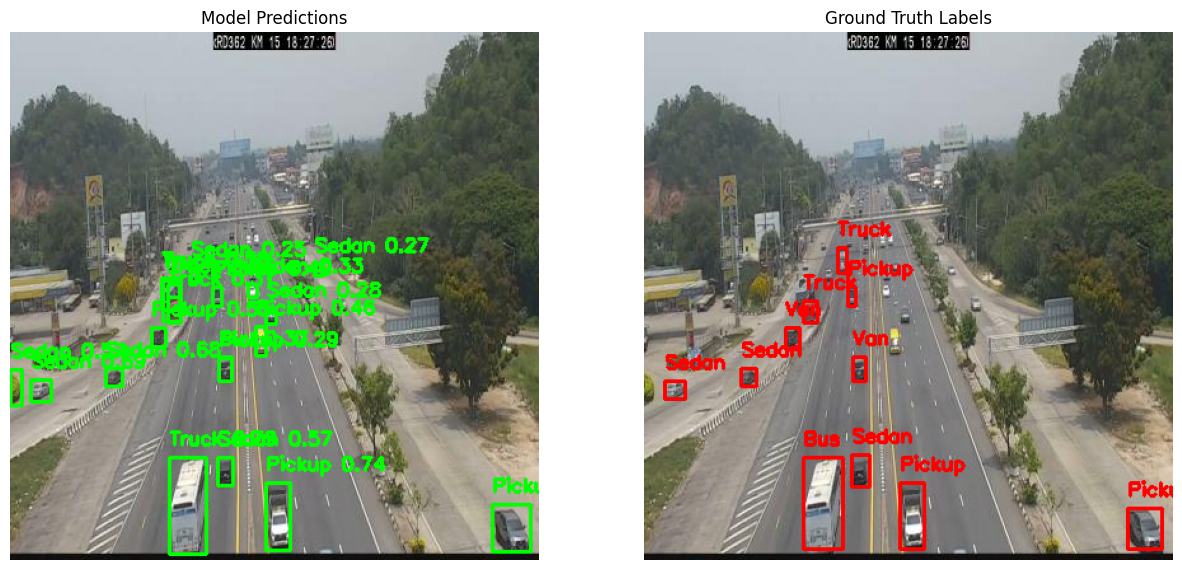

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

plt.figure(figsize = (30,30))
# Helper function to draw bounding boxes
def draw_boxes(image, boxes, class_ids, confidences=None, class_names=None, color=(0, 255, 0)):
    for i in range(len(boxes)):
        x1, y1, x2, y2 = map(int, boxes[i])  # Convert box coordinates to integers
        class_id = int(class_ids[i])

        # Draw the bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

        # Add label with class name and confidence score (if provided)
        label = f"{class_names[class_id]}" if class_names else f"Class {class_id}"
        if confidences is not None:
            label += f" {confidences[i]:.2f}"
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return image

def load_labels(label_file, img_width, img_height):
    boxes = []
    class_ids = []
    with open(label_file, 'r') as file:
        for line in file.readlines():
            parts = line.strip().split()
            if len(parts) != 5:  # Check for correct number of values
                print(f"Skipping malformed line: {line}")
                continue
            class_id = int(parts[0])
            try:
                x_center, y_center, width, height = map(float, parts[1:])
            except ValueError as e:
                print(f"Error parsing line: {line}. Error: {e}")
                continue

            # Convert from YOLO format (x_center, y_center, width, height) to (x1, y1, x2, y2)
            x1 = int((x_center - width / 2) * img_width)
            y1 = int((y_center - height / 2) * img_height)
            x2 = int((x_center + width / 2) * img_width)
            y2 = int((y_center + height / 2) * img_height)

            boxes.append([x1, y1, x2, y2])
            class_ids.append(class_id)
    return boxes, class_ids

# Paths to the image and corresponding ground truth labels
image_path = '/content/Car-Counting-1/train/images/-freemake_com-LOGO--DOH_14_mp4-0_jpg.rf.b3dbb613a92a391872665f28503e0594.jpg'  # Replace with your image path
label_path = '/content/Car-Counting-1/train/labels/-freemake_com-LOGO--DOH_14_mp4-0_jpg.rf.b3dbb613a92a391872665f28503e0594.txt'  # Replace with the corresponding label file path

# Load the original image
image = cv2.imread(image_path)
img_height, img_width, _ = image.shape

# Perform inference on the image (model predictions)
results = model(image_path)

# Prepare two copies of the image: one for predictions and one for ground truth
image_pred = image.copy()  # For model predictions
image_gt = image.copy()  # For ground truth labels

# Draw model's predicted bounding boxes on image_pred
for result in results:
    boxes_pred = result.boxes.xyxy  # Predicted bounding boxes (x1, y1, x2, y2)
    class_ids_pred = result.boxes.cls  # Predicted class IDs
    confidences_pred = result.boxes.conf  # Confidence scores

    image_pred = draw_boxes(image_pred, boxes_pred, class_ids_pred, confidences_pred, model.names)

# Draw ground truth bounding boxes on image_gt
boxes_gt, class_ids_gt = load_labels(label_path, img_width, img_height)
image_gt = draw_boxes(image_gt, boxes_gt, class_ids_gt, class_names=model.names, color=(0, 0, 255))  # Red for ground truth

# Convert BGR (OpenCV format) to RGB for displaying with matplotlib
image_pred_rgb = cv2.cvtColor(image_pred, cv2.COLOR_BGR2RGB)
image_gt_rgb = cv2.cvtColor(image_gt, cv2.COLOR_BGR2RGB)

# Display both images side by side using matplotlib
plt.figure(figsize=(15, 10))

# Model Predictions
plt.subplot(1, 2, 1)
plt.imshow(image_pred_rgb)
plt.title('Model Predictions')
plt.axis('off')

# Ground Truth Labels
plt.subplot(1, 2, 2)
plt.imshow(image_gt_rgb)
plt.title('Ground Truth Labels')
plt.axis('off')

plt.show()


In [ ]:
import shutil

# Define the path to the folder and the output ZIP file
folder_path = '/content/runs'  # Replace with your folder path
zip_path = '/content/runs.zip'

# Create a ZIP file from the folder
shutil.make_archive('/content/folder_name', 'zip', folder_path)

'/content/folder_name.zip'

In [6]:
from ultralytics import YOLO
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Load the YOLO model
model = YOLO("/content/best.pt")  # Use the path to your trained YOLO model
def green_light():
  # Initialize the green light timing thresholds
  MIN_GREEN_TIME = 10  # Minimum green light time in seconds
  MAX_GREEN_TIME = 60  # Maximum green light time in seconds
  BASE_GREEN_TIME = 10  # Base time in seconds for low vehicle counts

  # Define a function to determine green light duration based on vehicle count
  def calculate_green_duration(vehicle_count):
      return min(MAX_GREEN_TIME, max(MIN_GREEN_TIME, BASE_GREEN_TIME + 2 * vehicle_count))

  # Define a function to process an image and return the vehicle count
  def get_vehicle_count(image_path):
      # Run YOLO model on the image
      results = model(image_path)

      # Count vehicles by counting bounding boxes
      vehicle_count = sum(1 for box in results[0].boxes if box.cls == 2)  # Assuming class 2 is 'car'
      return vehicle_count

  # Main algorithm to decide green light direction and duration
  def traffic_control_with_display(image_paths):
      vehicle_counts = {}
      l = []

      # Count vehicles in each direction
      for direction, image_path in image_paths.items():
          vehicle_counts[direction] = get_vehicle_count(image_path)
          l.append([direction,calculate_green_duration(get_vehicle_count(image_path))])

      # Determine direction with the highest vehicle count
      max_direction = max(vehicle_counts, key=vehicle_counts.get)
      green_duration = calculate_green_duration(vehicle_counts[max_direction])

      # Display each image with labels and border around the selected direction
      images_with_labels = []
      for direction, image_path in image_paths.items():
          img = Image.open(image_path).convert("RGB")
          draw = ImageDraw.Draw(img)

          # Label the image with the direction and vehicle count
          label = f"{direction.capitalize()}: {vehicle_counts[direction]} vehicles"
          draw.text((10, 10), label, fill="white")

          # Add green border if this direction has the green light
          if direction == max_direction:
              border_color = "green"
          else:
              border_color = "red"
          border_width = 10
          img_with_border = Image.new("RGB", (img.width + 2 * border_width, img.height + 2 * border_width), border_color)
          img_with_border.paste(img, (border_width, border_width))

          images_with_labels.append((direction, img_with_border))

      # Plot all images in a 2x2 grid
      plt.figure(figsize=(10, 10))
      for i, (direction, img) in enumerate(images_with_labels):
          plt.subplot(2, 2, i + 1)
          plt.imshow(img)
          plt.title(direction.capitalize())
          #plt.title(l)
          plt.axis("off")

      # Show the plot
      plt.suptitle(f"Green light for {max_direction.capitalize()} direction for {green_duration} seconds", fontsize=16, color="green")
      plt.show()
      print(l)

      # Return decision details if needed
      return max_direction, green_duration, vehicle_counts


  # Example usage
  image_paths = {
      'north': '/content/north_image2.jpg',
      'south': '/content/south_image2.jpg',
      'east': '/content/east_image2.jpg',
      'west': '/content/west_image2.jpg'
  }

  # Run the traffic control algorithm
  direction, duration, counts = traffic_control_with_display(image_paths)



image 1/1 /content/north_image2.jpg: 640x640 1 Motorcyecle, 3 Sedans, 1 Van, 13.0ms
Speed: 4.0ms preprocess, 13.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/north_image2.jpg: 640x640 1 Motorcyecle, 3 Sedans, 1 Van, 8.8ms
Speed: 3.1ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/south_image2.jpg: 640x640 5 Sedans, 1 Suv, 8.1ms
Speed: 3.1ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/south_image2.jpg: 640x640 5 Sedans, 1 Suv, 8.2ms
Speed: 3.2ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/east_image2.jpg: 640x640 2 Pickups, 5 Sedans, 1 Truck, 1 Van, 8.3ms
Speed: 3.0ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/east_image2.jpg: 640x640 2 Pickups, 5 Sedans, 1 Truck, 1 Van, 10.7ms
Speed: 3.0ms preprocess, 10.7ms inf

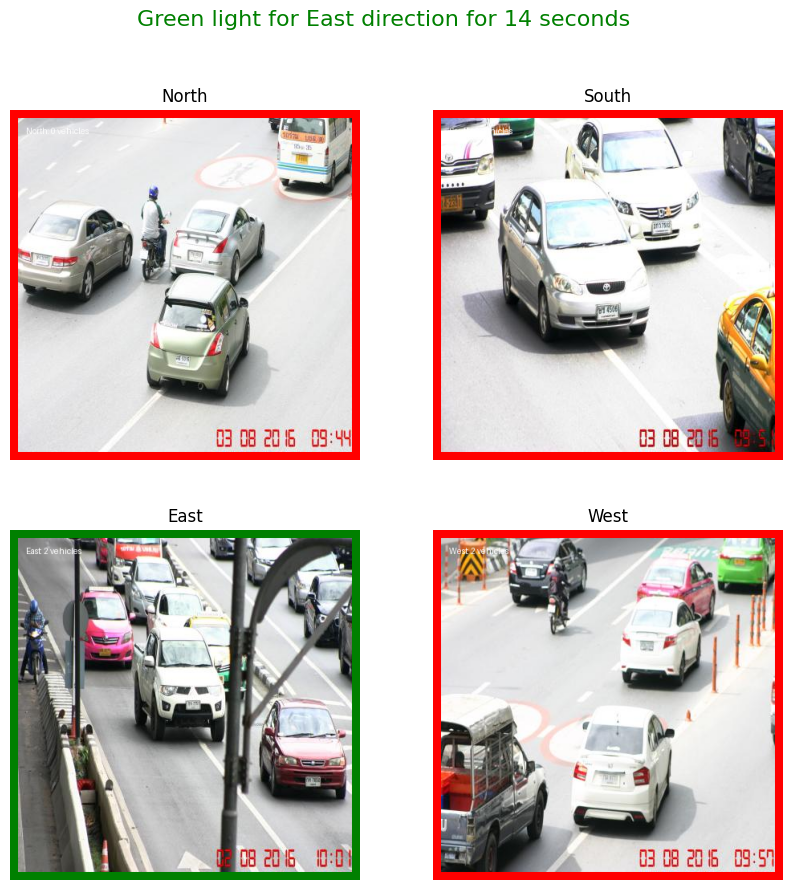

[['north', 10], ['south', 10], ['east', 14], ['west', 14]]


In [7]:
green_light()